In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mticker
# === Functions ===

def get_prices(round: int, day: int):
    path = f"data/round_{round}/prices_round_{round}_day_{day}.csv"
    return pd.read_csv(path, sep=";")

def get_trades(round: int, day: int):
    path = f"data/round_{round}/trades_round_{round}_day_{day}.csv"
    return pd.read_csv(path, sep=";")

def load_data(market_id, session_id):
    prices = get_prices(market_id, session_id)
    trades = get_trades(market_id, session_id)
    return prices, trades

def filter_data(prices, trades, product_name):
    prices = prices[prices['product'] == product_name]
    trades = trades[trades['symbol'] == product_name]
    return prices, trades

def prepare_data(prices, trades):
    prices['timestamp'] = pd.to_numeric(prices['timestamp'])
    trades['timestamp'] = pd.to_numeric(trades['timestamp'])
    prices = prices.sort_values('timestamp')
    trades = trades.sort_values('timestamp')
    return prices, trades

def plot_mid_price(prices, product_name):
    plt.figure(figsize=(15, 5))
    plt.plot(prices['timestamp'], prices['mid_price'], label='Mid Price', color='black')
    plt.xlabel('Timestamp')
    plt.ylabel('Mid Price')
    plt.title(f'{product_name} - Mid Price Over Time')
    plt.legend()
    plt.show()

def plot_trades(trades, product_name):
    plt.figure(figsize=(15, 5))
    plt.plot(trades['timestamp'], trades['price'], label='Trade Price', color='blue', marker='o', linestyle='None')
    plt.xlabel('Timestamp')
    plt.ylabel('Trade Price')
    plt.title(f'{product_name} - Trades Over Time')
    plt.legend()
    plt.show()

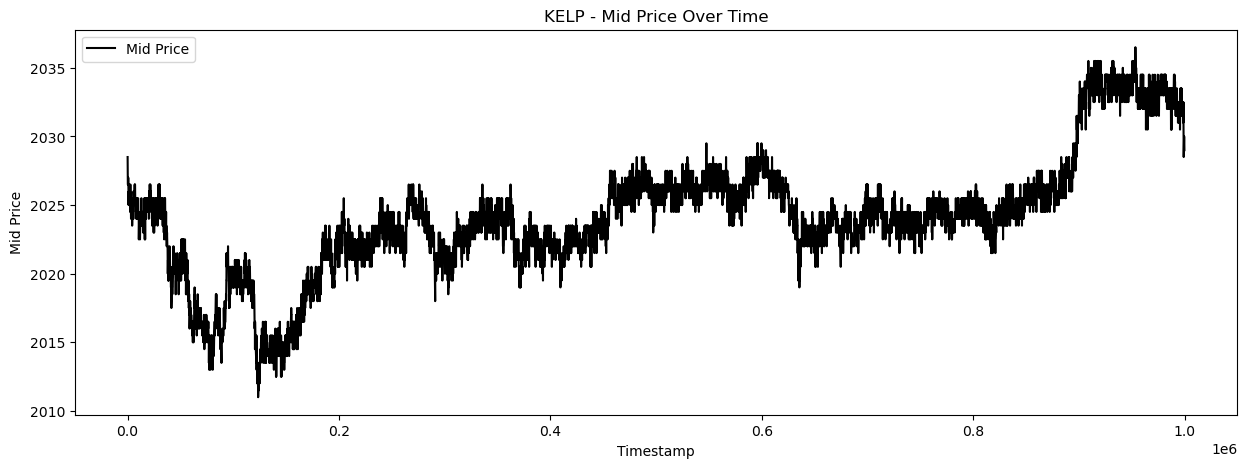

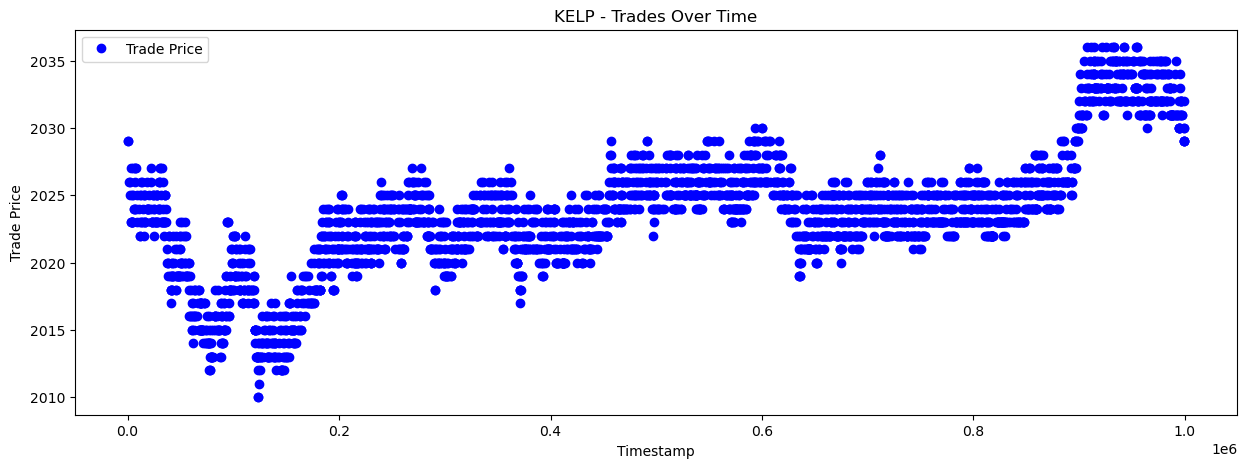

In [3]:
# Variables you can easily change
MARKET_ID = 1
SESSION_ID = -1
PRODUCT_NAME = 'KELP'



# Load, filter, prepare, plot
prices, trades = load_data(MARKET_ID, SESSION_ID)
prices, trades = filter_data(prices, trades, PRODUCT_NAME)
prices, trades = prepare_data(prices, trades)
plot_mid_price(prices, PRODUCT_NAME)
plot_trades(trades, PRODUCT_NAME)

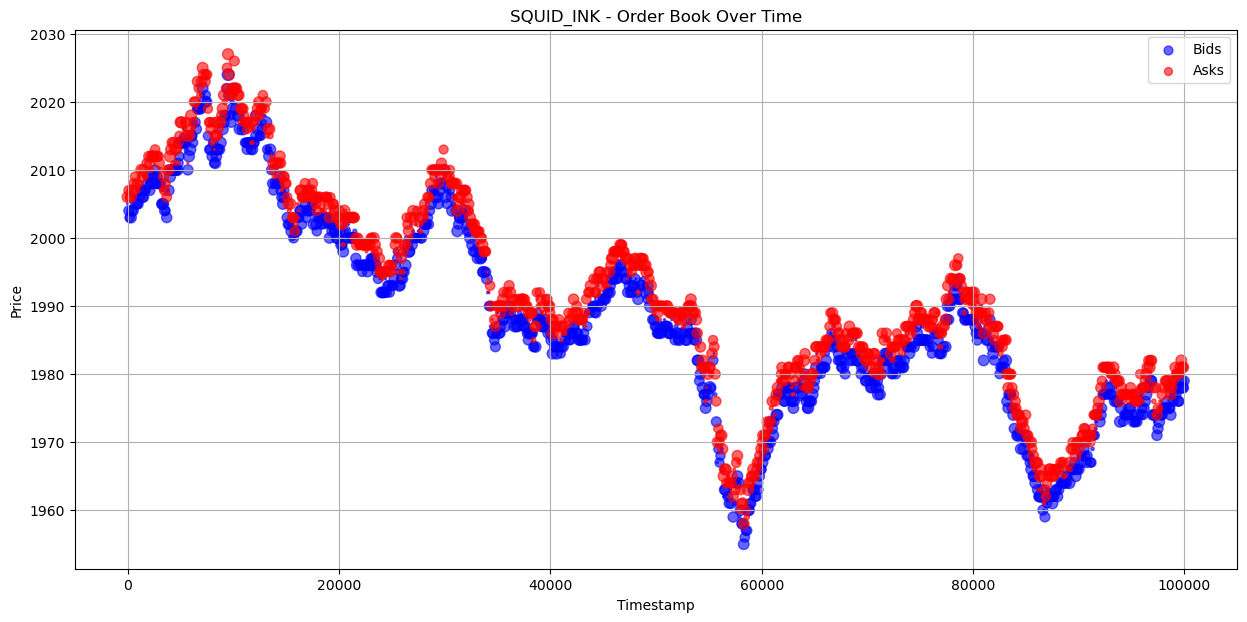

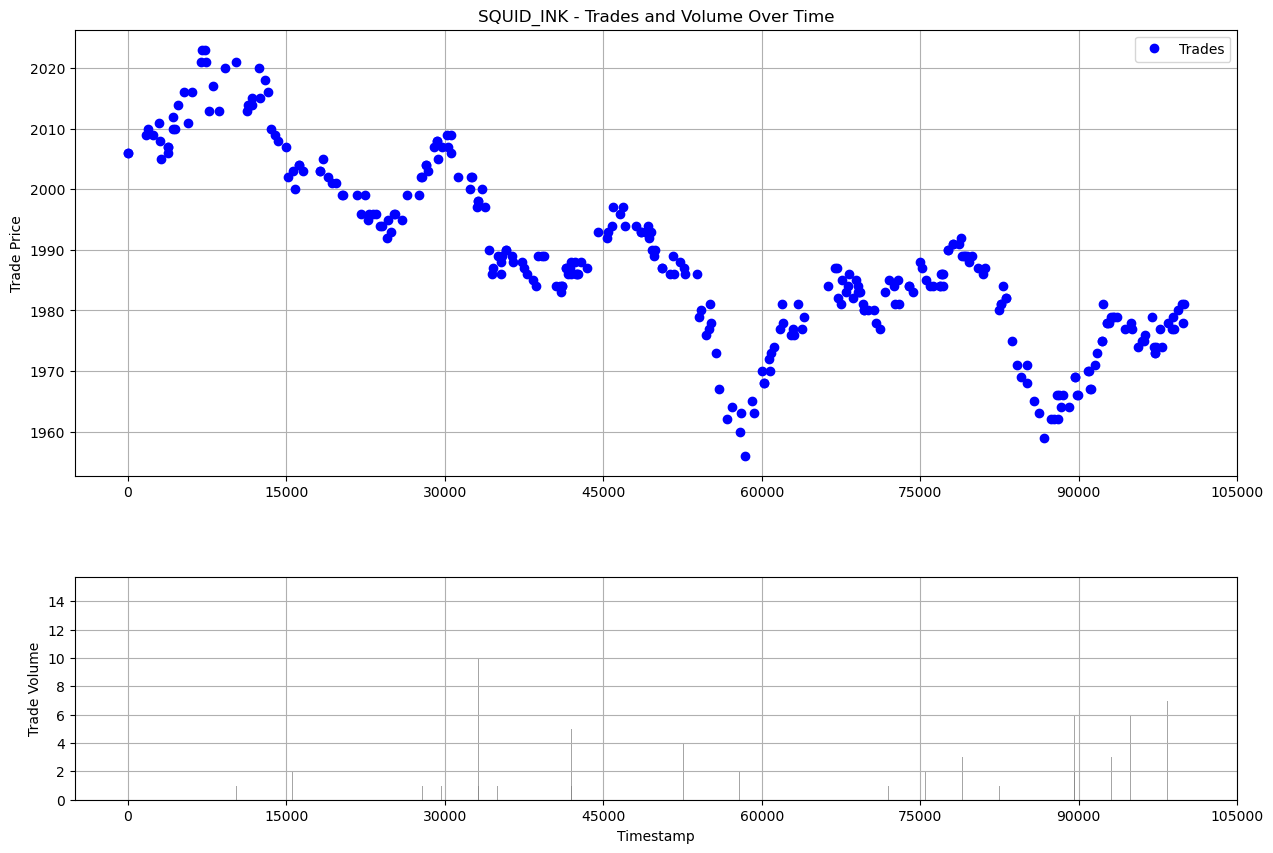

In [4]:
def plot_order_book(prices, product_name):
    plt.figure(figsize=(15, 7))
    
    bid_prices = prices[prices['bid_price_1'] > 0]
    ask_prices = prices[prices['ask_price_1'] > 0]
    
    plt.scatter(bid_prices['timestamp'], bid_prices['bid_price_1'], 
                s=bid_prices['bid_volume_1']*2, color='blue', label='Bids', alpha=0.6)
    plt.scatter(ask_prices['timestamp'], ask_prices['ask_price_1'], 
                s=ask_prices['ask_volume_1']*2, color='red', label='Asks', alpha=0.6)

    plt.xlabel('Timestamp')
    plt.ylabel('Price')
    plt.title(f'{product_name} - Order Book Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_trades_and_volume(trades, product_name):
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 1, height_ratios=[2, 1], hspace=0.3)

    # First subplot: Trades (price over time)
    ax0 = fig.add_subplot(gs[0])
    ax0.plot(trades['timestamp'], trades['price'], 
             marker='o', linestyle='None', color='blue', label='Trades')
    ax0.set_ylabel('Trade Price')
    ax0.set_title(f'{product_name} - Trades and Volume Over Time')
    ax0.legend()
    ax0.grid(True)

    # Second subplot: Volume traded
    ax1 = fig.add_subplot(gs[1], sharex=ax0)
    ax1.bar(trades['timestamp'], trades['quantity'], width=5, color='grey', alpha=0.7)
    ax1.set_ylabel('Trade Volume')
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)
    
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    plt.show()

# === Variables you can easily change ===
MARKET_ID = 1
SESSION_ID = -1
PRODUCT_NAME = 'SQUID_INK'

# Zoom window
START_TIME = 0      # Change here to zoom
END_TIME = 100000    # Change here to zoom

# === Load, filter, prepare, zoom, plot ===
prices, trades = load_data(MARKET_ID, SESSION_ID)
prices, trades = filter_data(prices, trades, PRODUCT_NAME)
prices, trades = prepare_data(prices, trades)

# Apply timestamp zoom
prices = prices[(prices['timestamp'] >= START_TIME) & (prices['timestamp'] <= END_TIME)]
trades = trades[(trades['timestamp'] >= START_TIME) & (trades['timestamp'] <= END_TIME)]

# Plot
plot_order_book(prices, PRODUCT_NAME)
plot_trades_and_volume(trades, PRODUCT_NAME)

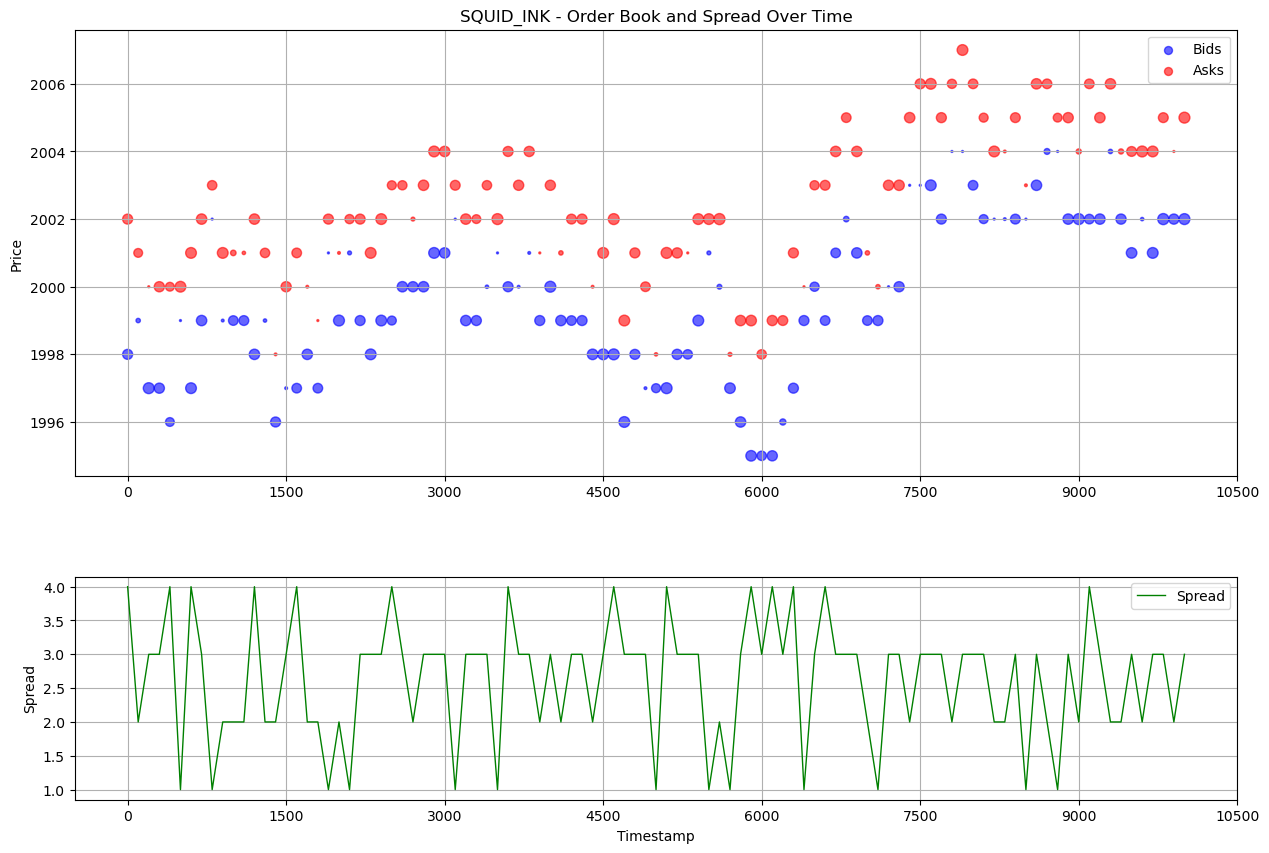

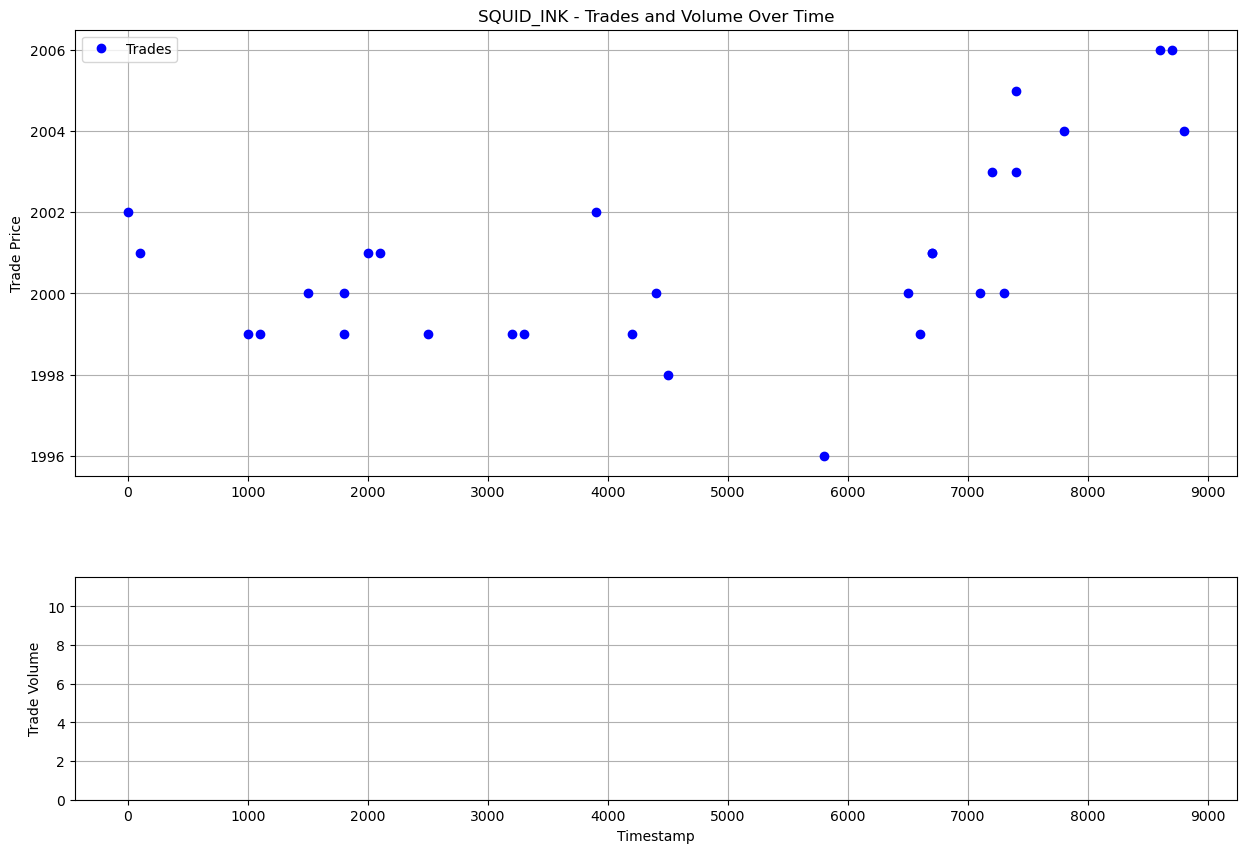

In [5]:
def plot_order_book_and_spread(prices, product_name):
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 1, height_ratios=[2, 1], hspace=0.3)

    # First panel: Bids and Asks
    ax0 = fig.add_subplot(gs[0])

    bid_prices = prices[prices['bid_price_1'] > 0]
    ask_prices = prices[prices['ask_price_1'] > 0]

    ax0.scatter(bid_prices['timestamp'], bid_prices['bid_price_1'], 
                s=bid_prices['bid_volume_1']*2, color='blue', label='Bids', alpha=0.6)
    ax0.scatter(ask_prices['timestamp'], ask_prices['ask_price_1'], 
                s=ask_prices['ask_volume_1']*2, color='red', label='Asks', alpha=0.6)

    ax0.set_ylabel('Price')
    ax0.set_title(f'{product_name} - Order Book and Spread Over Time')
    ax0.legend()
    ax0.grid(True)

    # Second panel: Spread
    ax1 = fig.add_subplot(gs[1], sharex=ax0)

    # Calculate spread
    prices['spread'] = prices['ask_price_1'] - prices['bid_price_1']

    ax1.plot(prices['timestamp'], prices['spread'], color='green', label='Spread', linewidth=1)
    ax1.set_ylabel('Spread')
    ax1.set_xlabel('Timestamp')
    ax1.legend()
    ax1.grid(True)

    ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    plt.show()

def plot_trades_and_volume(trades, product_name):
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 1, height_ratios=[2, 1], hspace=0.3)

    # First panel: Trades
    ax0 = fig.add_subplot(gs[0])
    ax0.plot(trades['timestamp'], trades['price'], 
             marker='o', linestyle='None', color='blue', label='Trades')
    ax0.set_ylabel('Trade Price')
    ax0.set_title(f'{product_name} - Trades and Volume Over Time')
    ax0.legend()
    ax0.grid(True)

    # Second panel: Trade volume
    ax1 = fig.add_subplot(gs[1], sharex=ax0)
    ax1.bar(trades['timestamp'], trades['quantity'], width=5, color='grey', alpha=0.7)
    ax1.set_ylabel('Trade Volume')
    ax1.set_xlabel('Timestamp')
    ax1.grid(True)
    
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    plt.show()

# === Variables you can easily change ===
MARKET_ID = 1
SESSION_ID = -2
PRODUCT_NAME = 'SQUID_INK'

# Zoom window
START_TIME = 0      # Change here to zoom
END_TIME = 10000    # Change here to zoom

# === Load, filter, prepare, zoom, plot ===
prices, trades = load_data(MARKET_ID, SESSION_ID)
prices, trades = filter_data(prices, trades, PRODUCT_NAME)
prices, trades = prepare_data(prices, trades)

# Apply timestamp zoom
prices = prices[(prices['timestamp'] >= START_TIME) & (prices['timestamp'] <= END_TIME)]
trades = trades[(trades['timestamp'] >= START_TIME) & (trades['timestamp'] <= END_TIME)]

# Plot
plot_order_book_and_spread(prices, PRODUCT_NAME)
plot_trades_and_volume(trades, PRODUCT_NAME)